# Compounding

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def compound_growth(
    currency: str,
    initial_investment: float,
    annual_rate: float,
    inflow: float = 0,
    years: float = 0,
    periods_per_year: int = 12
):
    """
    Compound growth with periodic inflows and summary output.

    Params:
        currency (string): Currency used
        initial_investment (float): Starting amount
        annual_rate (float): Annual interest rate (e.g., 0.07 for 7%)
        inflow (float): Contribution per period
        years (float): Investment duration in years
        periods_per_year (int): Compounding frequency (e.g., 12 = monthly)

    Returns:
        DataFrame of balance over time
        :rtype: DataFrame
    """
    # --- Initial Calculations ---
    total_periods = years * periods_per_year
    period_rate = annual_rate / periods_per_year
    starting_balance = initial_investment
    ending_balance = 0
    cumulated_interest=0
    results = []

    for period in range(total_periods):
        time = period / periods_per_year
        initial_investment2 =0
        ending_balance = round(starting_balance * (1 + period_rate),2)
        period_interest = round(ending_balance-starting_balance,2)
        cumulated_interest = cumulated_interest + period_interest
        results.append((time, inflow,starting_balance,period_interest,ending_balance,cumulated_interest))
        starting_balance = round(ending_balance+ inflow + initial_investment2,2)

    df = pd.DataFrame(results, columns=["Year","Inflow", "Starting_Balance","Interest", "Ending_Balance","P&L"])
    df["Inflow"].iloc[0]=0
    df.index = range(1, len(df) + 1) # df starts with index = 1 instead of 0

    # --- Summary Calculations ---
    final_balance = df["Ending_Balance"].iloc[-1]
    total_invested = initial_investment + inflow * (total_periods-1)
    total_interest = (final_balance - total_invested)

    # --- Print Summary ---
    print("📊 Compound Interest Summary")
    print(f"Initial Investment : {initial_investment:,.2f} {currency}")
    print(f"Periodic Inflow    : {inflow:,.2f} {currency} every {12 // periods_per_year} months")
    print(f"Annual Rate        : {annual_rate * 100:.2f}%")
    print(f"Total Years        : {years}")
    print(f"Total Invested     : {total_invested:,.2f} {currency}")
    print(f"Total Interest     : {total_interest:,.2f} {currency}")
    print(" ")
    print(f"Final Balance      : {final_balance:,.2f} {currency}")
    print(" ")

    # --- Plot ---
    plt.figure(figsize=(10, 5))
    plt.plot(df["Year"], df["Ending_Balance"], label="Investment Growth")
    plt.title("Compound Interest Growth Over Time")
    plt.xlabel("Years")
    plt.ylabel(f"Portfolio Value ({currency})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df

📊 Compound Interest Summary
Initial Investment : 10,000.00 CHF
Periodic Inflow    : 3,500.00 CHF every 1 months
Annual Rate        : 25.00%
Total Years        : 10
Total Invested     : 426,500.00 CHF
Total Interest     : 1,515,494.25 CHF
 
Final Balance      : 1,941,994.25 CHF
 
         Year  Inflow  Starting_Balance  Interest  Ending_Balance         P&L
108  8.916667    3500        1448546.18  30178.05      1478724.23  1094224.23
109  9.000000    3500        1482224.23  30879.67      1513103.90  1125103.90
110  9.083333    3500        1516603.90  31595.91      1548199.81  1156699.81
111  9.166667    3500        1551699.81  32327.08      1584026.89  1189026.89
112  9.250000    3500        1587526.89  33073.48      1620600.37  1222100.37
113  9.333333    3500        1624100.37  33835.42      1657935.79  1255935.79
114  9.416667    3500        1661435.79  34613.25      1696049.04  1290549.04
115  9.500000    3500        1699549.04  35407.27      1734956.31  1325956.31
116  9.583333    3

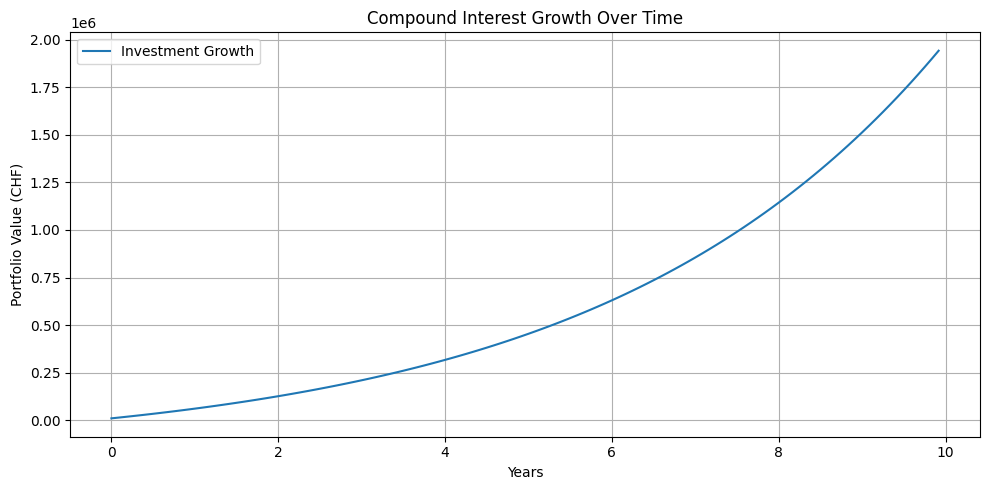

In [4]:
df = compound_growth(
    currency="CHF",
    initial_investment=10000,
    annual_rate=0.25,
    inflow=3500, # Per period
    years=10,
    periods_per_year= 12 # Ex: Daily = 360 / Monthly = 12
)

print(df.tail(13))